In [26]:
import sys
import matplotlib.pyplot as plt
import json
import numpy as np
from matplotlib.lines import Line2D

sys.path.append("..")

In [2]:
lang = "SV"
with open("../data/" + lang.lower() + "_corpus.txt") as file:
    corpus = file.read()

In [3]:
print(lang + " corpus has " + str(len(corpus)) + " characters")

SV corpus has 2768501 characters


In [4]:
from src.constants import LANG_CODES, FGN_ALPH # TODO language performance analisys
from src.cipher_utils import create_encryption_dict, encode
from src.mcmc import cross_validation, get_best_solution

In [5]:
lang_perc_dicts ={}
lang_encryption_dicts = {}
for lang_code in LANG_CODES:

    with open("../data/" + lang_code +"_perc_dict.json") as file:
        perc_dict = json.load(file)
        lang_perc_dicts[lang_code] = perc_dict

    lang_encryption_dicts[lang_code] = create_encryption_dict(FGN_ALPH[lang_code])

In [6]:
messages = {"pl" : "W samym sercu lasu, gdzie drzewa tworzyły gęsty dach, a ścieżki były ledwie widoczne, mieszkał kotek o imieniu Epsilon. Jego futro było szare z białymi łatkami, a oczy błyszczały jak dwa małe księżyce. Pewnego dnia, podczas swojej codziennej wędrówki, Epsilon natknął się na nieznaną ścieżkę, porośniętą dzikimi malinami. Zaintrygowany, postanowił ją zbadać. Ścieżka prowadziła go przez gęste zarośla, aż dotarł do polany, na której rosły niezwykle wysokie kwiaty w kolorze fioletowym. W ich cieniu ukryte były małe, błyszczące kamyczki. Epsilon zaczął je zbierać, czując się jak odkrywca skarbów. Po chwili zauważył, że jeden z kamyczków świecił jaśniej niż pozostałe. Postanowił zabrać go ze sobą. W drodze powrotnej spotkał starego żuka, który opowiedział mu legendę o magicznych kamieniach, które spełniają życzenia tych, którzy je znajdą. Epsilon, choć nie wierzył w legendy, pomyślał o jednym życzeniu: by jego las nigdy nie został zniszczony. Następnego dnia, wracając do polany, zauważył, że kwiaty fioletowe zaczęły się rozrastać, a las wokół niego stał się jeszcze piękniejszy. Uśmiechnął się, czując, że jego życzenie zostało wysłuchane.".lower(),
            "sv" : "I hjärtat av skogen, där träden bildade ett tätt tak och stigarna knappt var synliga, bodde en katt vid namn Epsilon. Hans päls var grå med vita fläckar, och hans ögon glänste som två små månar. En dag, under sin dagliga vandring, stötte Epsilon på en okänd stig täckt av vilda hallon. Nyfiken bestämde han sig för att utforska den. Stigen ledde honom genom täta buskar tills han nådde en glänta där ovanligt höga blommor i lila färg växte. I deras skugga låg små, glänsande stenar. Epsilon började samla dem och kände sig som en skattletare. Efter en stund märkte han att en av stenarna lyste starkare än de andra. Han bestämde sig för att ta med den. På vägen tillbaka mötte han en gammal skalbagge som berättade en legend om magiska stenar som uppfyller önskningar för dem som hittar dem. Epsilon, även om han inte trodde på legender, tänkte på en önskan: att hans skog aldrig skulle förstöras. Nästa dag, när han återvände till gläntan, märkte han att de lila blommorna hade börjat sprida sig, och skogen omkring honom var ännu vackrare. Han log och kände att hans önskan hade blivit hörd.".lower(),
            "hu" : "Az erdő szívében, ahol a fák sűrű tetőt alkottak, és az ösvények alig voltak láthatók, élt egy macska, akit Epsilonnak hívtak. Szőre szürke volt fehér foltokkal, szemei pedig úgy ragyogtak, mint két kis hold. Egy napon, miközben szokásos sétáját tette, Epsilon egy ismeretlen ösvényre bukkant, amelyet vad málna borított. Kíváncsian úgy döntött, hogy felfedezi. Az ösvény sűrű bozótokon vezetett keresztül, míg egy tisztásra nem ért, ahol rendkívül magas lila virágok nőttek. Árnyékukban kis, csillogó kövecskék rejtőztek. Epsilon elkezdte őket gyűjteni, és úgy érezte magát, mint egy kincskereső. Néhány pillanat múlva észrevette, hogy az egyik kő fényesebben ragyog, mint a többi. Úgy döntött, magával viszi. Visszafelé találkozott egy öreg bogárral, aki elmondta neki a legendát a varázslatos kövekről, amelyek teljesítik azok kívánságait, akik megtalálják őket. Epsilon, bár nem hitt a legendákban, egy kívánságot gondolt: hogy az erdője soha ne pusztuljon el. Másnap, amikor visszatért a tisztásra, észrevette, hogy a lila virágok elkezdtek terjedni, és az erdő körülötte még szebbé vált. Elmosolyodott, és úgy érezte, kívánsága meghallgatásra talált.".lower(),
            "de" : "Im Herzen des Waldes, wo die Bäume ein dichtes Dach bildeten und die Pfade kaum sichtbar waren, lebte eine Katze namens Epsilon. Ihr Fell war grau mit weißen Flecken, und ihre Augen glänzten wie zwei kleine Monde. Eines Tages, während ihres täglichen Spaziergangs, stieß Epsilon auf einen unbekannten Pfad, der mit wilden Himbeeren bewachsen war. Neugierig beschloss sie, ihn zu erkunden. Der Pfad führte sie durch dichtes Gestrüpp, bis sie eine Lichtung erreichte, auf der ungewöhnlich hohe lila Blumen wuchsen. Im Schatten dieser Blumen lagen kleine, glänzende Steine. Epsilon begann, sie zu sammeln, und fühlte sich wie eine Schatzsucherin. Nach einer Weile bemerkte sie, dass einer der Steine heller leuchtete als die anderen. Sie beschloss, ihn mitzunehmen. Auf dem Rückweg traf sie einen alten Käfer, der ihr die Legende von magischen Steinen erzählte, die die Wünsche derjenigen erfüllen, die sie finden. Epsilon, obwohl sie nicht an Legenden glaubte, dachte an einen Wunsch: dass ihr Wald niemals zerstört wird. Am nächsten Tag, als sie zur Lichtung zurückkehrte, bemerkte sie, dass sich die lila Blumen ausgebreitet hatten und der Wald um sie herum noch schöner geworden war. Sie lächelte und hatte das Gefühl, dass ihr Wunsch erhört worden war.".lower(),
            "it" : "Nel cuore della foresta, dove gli alberi formavano un tetto fitto e i sentieri erano appena visibili, viveva un gatto di nome Epsilon. Il suo pelo era grigio con macchie bianche e i suoi occhi brillavano come due piccole lune. Un giorno, durante la sua passeggiata quotidiana, Epsilon si imbatté in un sentiero sconosciuto ricoperto di lamponi selvatici. Curioso, decise di esplorarlo. Il sentiero lo condusse attraverso fitte cespuglie fino a una radura dove crescevano fiori viola straordinariamente alti. All'ombra di questi fiori si nascondevano piccoli sassolini lucenti. Epsilon iniziò a raccoglierli, sentendosi come un cacciatore di tesori. Dopo un po', notò che uno dei sassolini brillava più degli altri. Decise di portarlo con sé. Sulla via del ritorno incontrò un vecchio scarabeo che gli raccontò una leggenda su pietre magiche che esaudiscono i desideri di chi le trova. Epsilon, pur non credendo nelle leggende, pensò a un desiderio: che la sua foresta non venisse mai distrutta. Il giorno dopo, tornando nella radura, notò che i fiori viola si erano diffusi e la foresta intorno a lui era diventata ancora più bella. Sorrise, sentendo che il suo desiderio era stato esaudito.".lower()}

In [7]:
encoded_messages = {}
for lang, message in messages.items():
    encoded_messages[lang] = encode(message, lang_encryption_dicts[lang])

In [ ]:
attempts = 10
iters = 25000

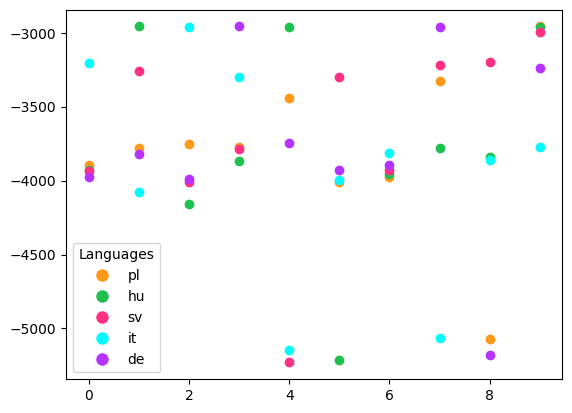

In [29]:
colors = ["#FF9719", "#1EC14E", "#FF3083", "#01FBFF", "#B632FF"]
fig, ax = plt.subplots()
for i, lang in enumerate(LANG_CODES):
    _, scores = cross_validation(attempts, encoded_messages[lang_code], lang_perc_dicts[lang_code], iters, alphabet=FGN_ALPH[lang_code])
    scores  = np.array(scores)
    ax.scatter(range(attempts), scores[:, -1], label = lang_code, color = colors[i])

legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=lang_code) for color, lang_code in zip(colors, LANG_CODES)]
ax.legend(handles=legend_handles, title="Languages")     
 
plt.show()

In [ ]:
# TODO czy język ma znaczenie, 
# spróbować rozkodować coś wg prawdopodobieństw innego języka tak żeby alfabety się odpowiednio zawierały
# i jak blisko jest się rozwiązania